# Page View Time Series Visualizer

Este ejercicio forma parte del curso *Data Analysis with Python* de [freeCodeCamp](https://www.freecodecamp.org/learn/data-analysis-with-python/).

**Consigna.** Para este proyecto utilizará Pandas, Matplotlib y Seaborn para crear distintos tipos de gráficos (line chart, bar chart y boxplot), con el objetivo de visualizar una serie temporal que contiene el número de páginas vistas cada día en el foro freeCodeCamp.org desde 2016-05-09 hasta 2019-12-03.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Read data
df = pd.read_csv("./fcc-forum-pageviews.csv", 
                 index_col = "date", 
                 parse_dates = True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


**1. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.**

In [3]:
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))]

**2. Create a line chart using Matplotlib. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".**

Text(0, 0.5, 'Page Views')

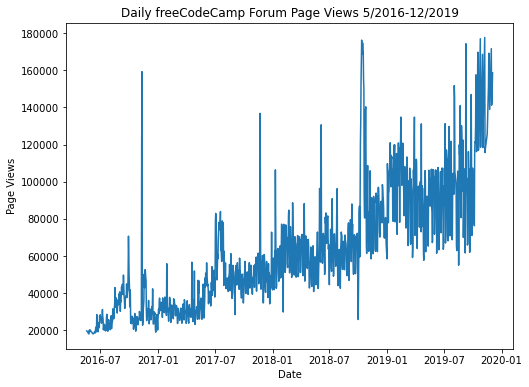

In [17]:
plt.figure(figsize = (8, 6))
plt.plot(df)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

**3. Create a bar chart using Seaborn. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".**

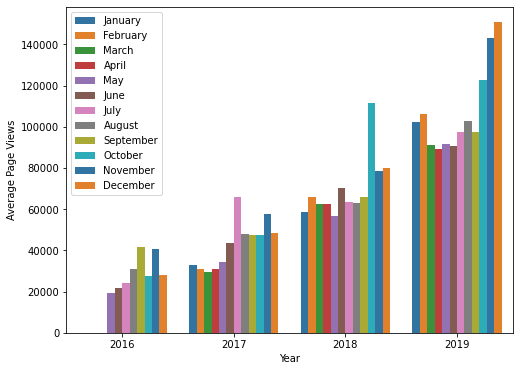

In [19]:
# Copy and modify data for monthly bar plot
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_bar = df.copy().resample("M").mean()
df_bar["year"] = df_bar.index.year
df_bar["month"] = pd.Categorical(df_bar.index.month_name(), categories = months)
    
# Draw bar plot
plt.figure(figsize = (8, 6))
sns.barplot(data = df_bar, x = "year", y = "value", hue = "month", palette = "tab10")
plt.xlabel("Year")
plt.ylabel("Average Page Views")
plt.legend(loc = "upper left")

**4. Create a box plots using Searborn. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan".**

(0.0, 200000.0)

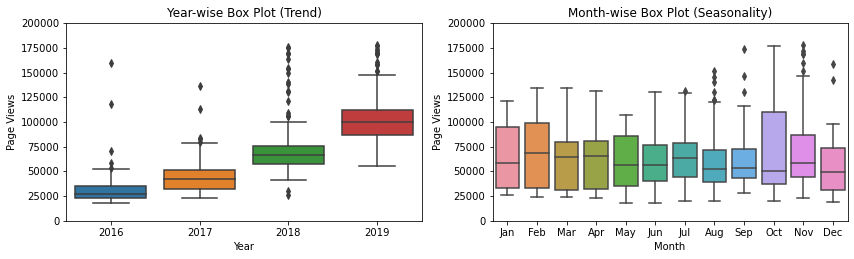

In [13]:
# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
# Draw box plots
plt.figure(figsize = (14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x = "year", y = "value", data = df_box)
plt.title("Year-wise Box Plot (Trend)")
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.ylim(0, 200000)
    
plt.subplot(2, 2, 2)
sns.boxplot(x = "month", y = "value", data = df_box,
            order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.ylim(0, 200000)